# Exploratory Analysis on Haberman Survival Data set

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

print(os.getcwd())
haber = pd.read_csv("haberman.csv")
print (haber.shape)

haber.columns=['Age','Op_Year','axil_nodes_det','Surv_status']
print (haber.columns)
haber.describe()


C:\Users\rhalde\Downloads
(305, 4)
Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


,Age,Op_Year,axil_nodes_det,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
haber["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

Observations:
Out of 305 people,only 224 people survived for 5 or more than 5 years of operation while 81 people died within 5 years. Thus the Haberman dataset is the unbalanced dataset

In [44]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age               305 non-null int64
Op_Year           305 non-null int64
axil_nodes_det    305 non-null int64
Surv_status       305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observation:There are no missing values in the dataset.

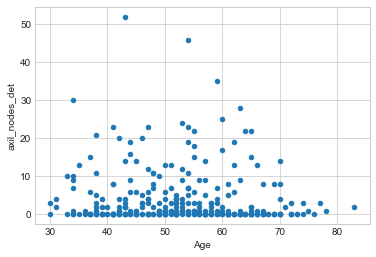

In [48]:
#2-D scatter plot:


haber.plot(kind='scatter', x='Age', y='axil_nodes_det') ;
plt.show()



Majority of people had 0 axillary nodes detected

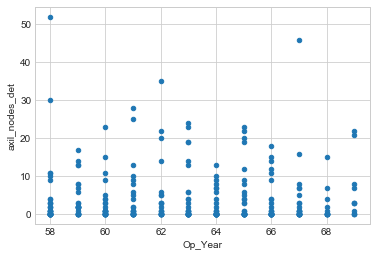

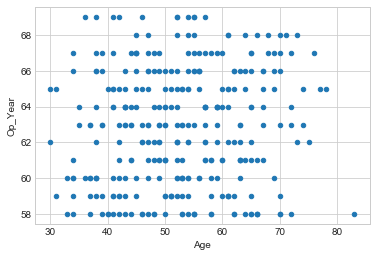

In [49]:
#2-D scatter plot:


haber.plot(kind='scatter', x='Op_Year', y='axil_nodes_det');
plt.show()
#2-D scatter plot:


haber.plot(kind='scatter', x='Age', y='Op_Year') ;
plt.show()

majority of operations took place in between 1960 to 1966.
People above 80 years are less likely to get operated.People who have detected axillary nodes basically have count in between 0-10.
Rarely people have nodes above 30

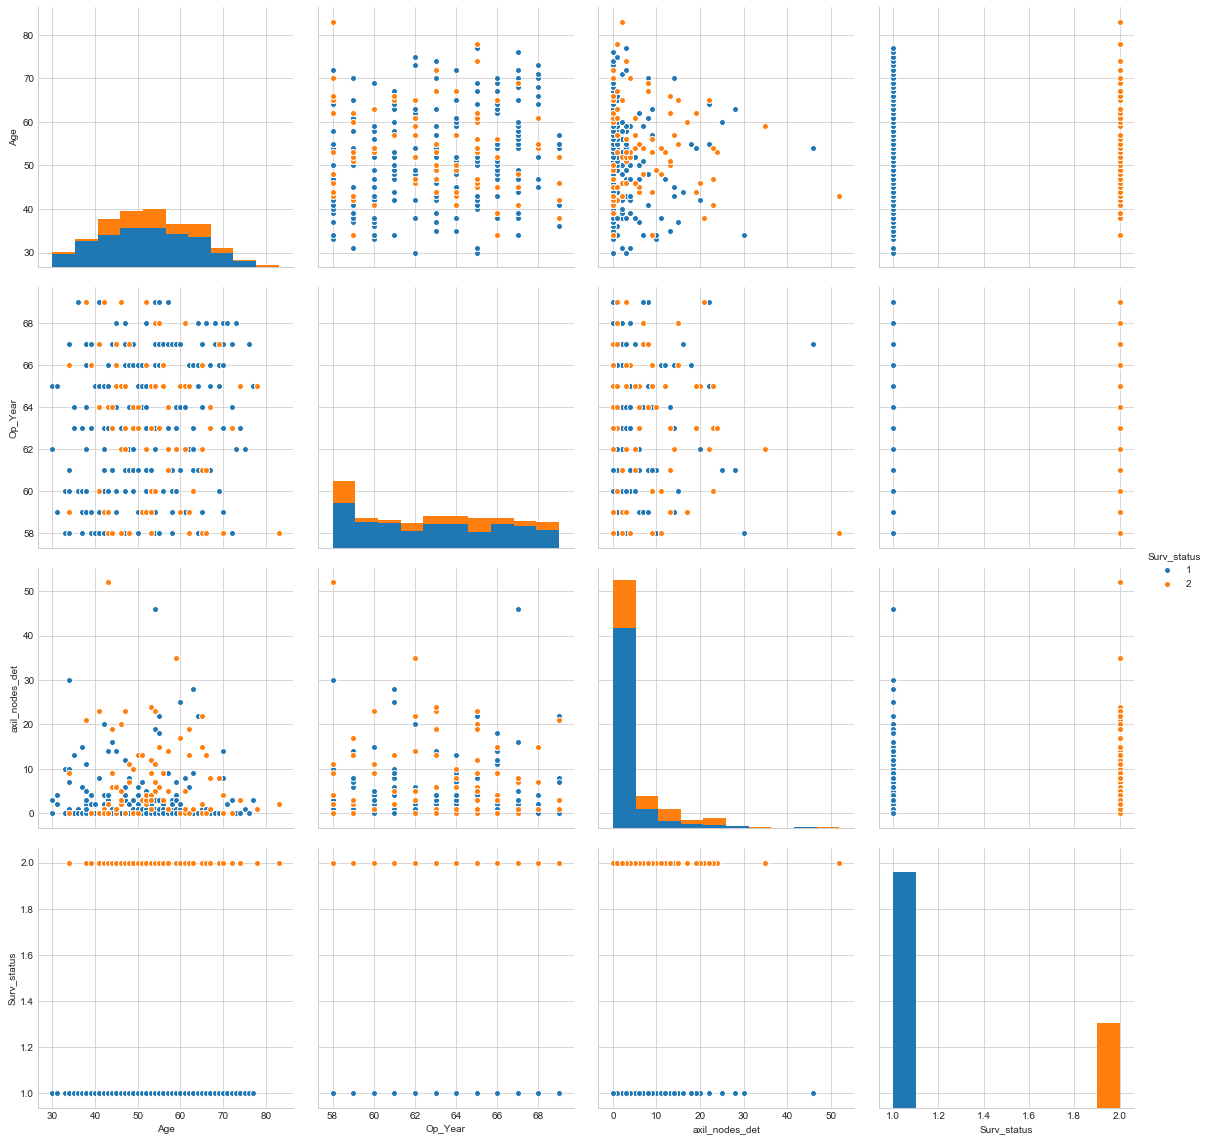

In [4]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="Surv_status", size=4);
plt.show()

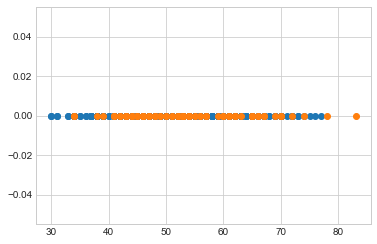

In [52]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
haber_survived = haber.loc[haber["Surv_status"] == 1];
haber_unsurvived = haber.loc[haber["Surv_status"] == 2];

#print(iris_setosa["petal_length"])
plt.plot(haber_survived["Age"], np.zeros_like(haber_survived['Age']), 'o')
plt.plot(haber_unsurvived["Age"], np.zeros_like(haber_unsurvived['Age']), 'o')

plt.show()

In [ ]:
mortality rate due to cancer is more among the age group of 40-65years

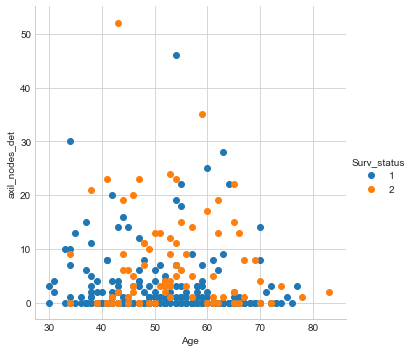

In [55]:
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(plt.scatter, 'Age', 'axil_nodes_det') \
   .add_legend();
plt.show();


People who did not had axillary nodes detected are more likely to survive.Chances of death increases as the nos of nodes goes above 10.Rarely people have nodes above 30.

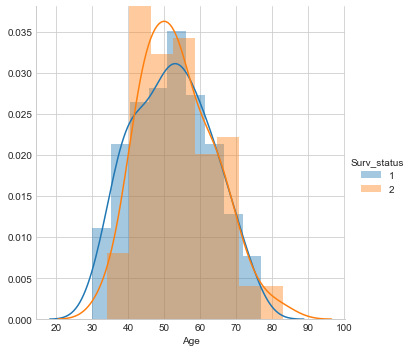

In [56]:
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

Both the histogram are not distincly separable.People between age group of 40-58 are more likely to lose their life.Safe zone lies for the people below the age of 35 years.

C:\Users\rhalde\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rhalde\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


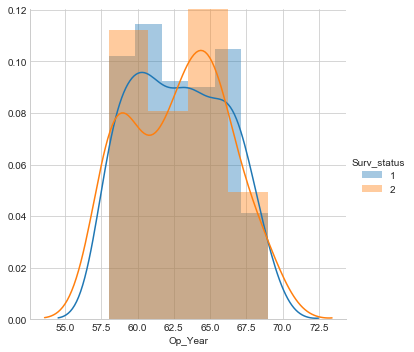

In [7]:
sns.FacetGrid(haber, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

Majority of the operations which took place within the year 1958 to 1966 resulted in the death of the patients.

[0.01785714 0.03125    0.04464286 0.0625     0.04464286 0.08035714
 0.04017857 0.05357143 0.09821429 0.06696429 0.07589286 0.08928571
 0.04910714 0.04464286 0.08035714 0.03125    0.02232143 0.04017857
 0.01339286 0.01339286]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


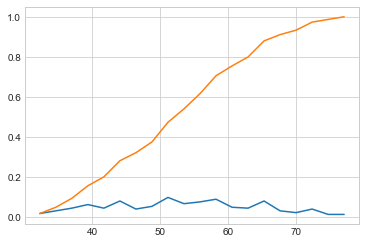

In [59]:
counts, bin_edges = np.histogram(haber_survived['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.show();


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


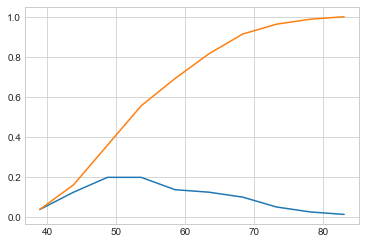

In [60]:

counts, bin_edges = np.histogram(haber_unsurvived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

In [57]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haber_unsurvived["Age"]))
print(np.mean(haber_survived["Age"]))


print("\nStd-dev:");
print(np.std(haber_unsurvived["Age"]))
print(np.std(haber_survived["Age"]))


Means:
53.67901234567901
52.11607142857143

Std-dev:
10.10418219303131
10.913004640364269


The age group from 43 to 63 years have higher risk of mortality.

In [58]:
print("\nMedians:")
print(np.median(haber_unsurvived["Age"]))
print(np.median(haber_survived["Age"]))


print("\nQuantiles:")
print(np.percentile(haber_unsurvived["Age"],np.arange(0, 100, 25)))
print(np.percentile(haber_survived["Age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haber_unsurvived["Age"],90))
print(np.percentile(haber_survived["Age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_unsurvived["Age"]))
print(robust.mad(haber_survived["Age"]))



Medians:
53.0
52.0

Quantiles:
[34. 46. 53. 61.]
[30. 43. 52. 60.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
11.860817748044816
13.343419966550417


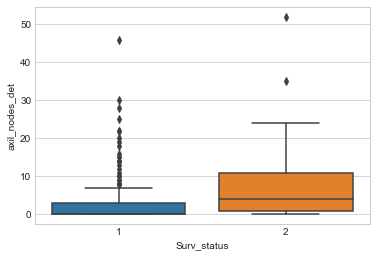

In [61]:
sns.boxplot(x='Surv_status',y='axil_nodes_det', data=haber)
plt.show()

People who survived majorly had no axillary nodes.People with the axillary node ranging from 1 to 25 are more prone to death.

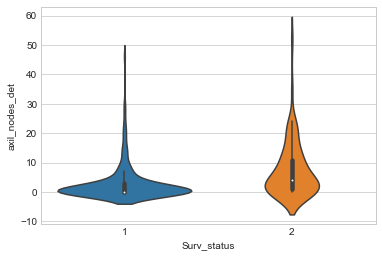

In [64]:
sns.violinplot(x="Surv_status", y="axil_nodes_det", data=haber, size=8)
plt.show()

The major observation from voilin plot is that if there are no axillary nodes in person he has more chances of survival.
on other hand as the nos of nodes increase the risk of death increases.

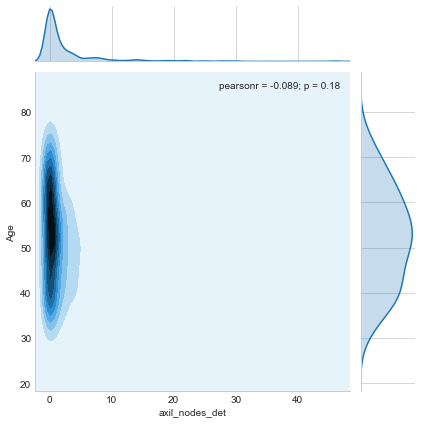

In [26]:
sns.jointplot(x="axil_nodes_det", y="Age", data=haber_survived, kind="kde");
plt.show();

Final Observations:

1.Along with the Age,number of axillary nodes detected in the person helps in determining in the chances of his survival.
These both features are helpfull in the study.There is clear dependency of survival of person on age and the nodes detected.

2.people with axillary nodes more than 30 is very less.

3.Majorly people who survived had no auxillary nodes.

4.People who have axillary nodes greater than 1 and age between 45-66 years are more likely to die.

5.Increase in number of nodes increases the chances of death.

6.Around 10% of people survived were ranging inthe age group of 50-60 yrs.

7.80% of people who died were below the age of 65yr.Gradually average life span of people has decreased upto approximately 65 yrs.

8.People who attempted operations between 1958 to 1966 where unsuccessful.

9.In the year 1967, the success rate of operation was high among all years.
